In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
def flip_coin(n, p):
    """Flip a coin of fairness p, n times.
    
    Parameters
    ----------
    n: int
      The number of times to flip the coin.

    p: float, between zero and one.
      The probability the coin flips heads.

    Returns
    -------
    flips: np.array of ints
      The results of the coin flips, where 0 is a tail and 1 is a head.
    """
    return np.random.binomial(1, 0.5, size=n)
flips = flip_coin(10,0.5)
print(flips)

[1 1 1 0 0 1 0 0 1 1]


In [4]:
def coin_log_likelihood(p, flips):
    """Return the log-likelihood of a parameter p given a sequence of coin flips.
    """
    binomial = stats.binom(n=1, p=p)
    log_sum = 0
    for flip in flips:
        log_sum += np.log(binomial.pmf(flip))
    return log_sum
flip_data = np.array([1,0,0,0,1,1,0,0,0,0])
print(coin_log_likelihood(0.5, flip_data), coin_log_likelihood(0.25, flip_data))

-6.931471805599453 -6.172657590522138


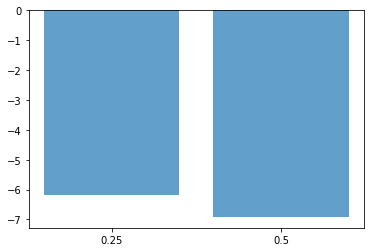

In [10]:
def plot_coin_likelihood(ax, ps, data):
    logList = []
    for i in range(len(ps)):
      logList.append(coin_log_likelihood(ps[i], data))
    tick_loc = np.arange(len(logList))
    ax.bar(tick_loc, [x for x in logList], width=0.8, alpha=0.7)
    ax.set_xticks(ticks=tick_loc)
    ax.set_xticklabels([str(x) for x in ps])
    

fig, ax = plt.subplots()
plot_coin_likelihood(ax, [.25, .5], flip_data)

plt.show()

    

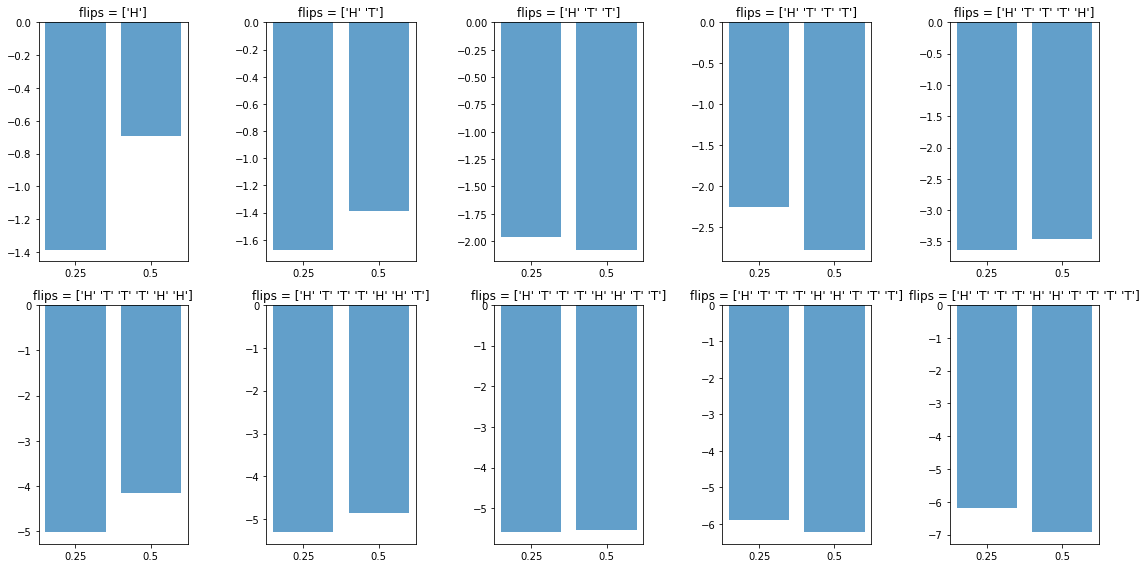

In [12]:
fig, axs = plt.subplots(2,5,figsize=(16,8))

data = np.array([[1], [1,0], [1,0,0], [1,0,0,0], [1,0,0,0,1], [1,0,0,0,1,1], [1,0,0,0,1,1,0], [1,0,0,0,1,1,0,0], [1,0,0,0,1,1,0,0,0], [1,0,0,0,1,1,0,0,0,0]])
ps = [0.25, 0.5]


for datum, ax in zip(data, axs.flatten()):
    plot_coin_likelihood(ax, ps, datum)
    ax.set_title(f'flips = {np.array(["T","H"])[datum]}')

plt.tight_layout()
plt.show()

/Users/justinlansdale/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


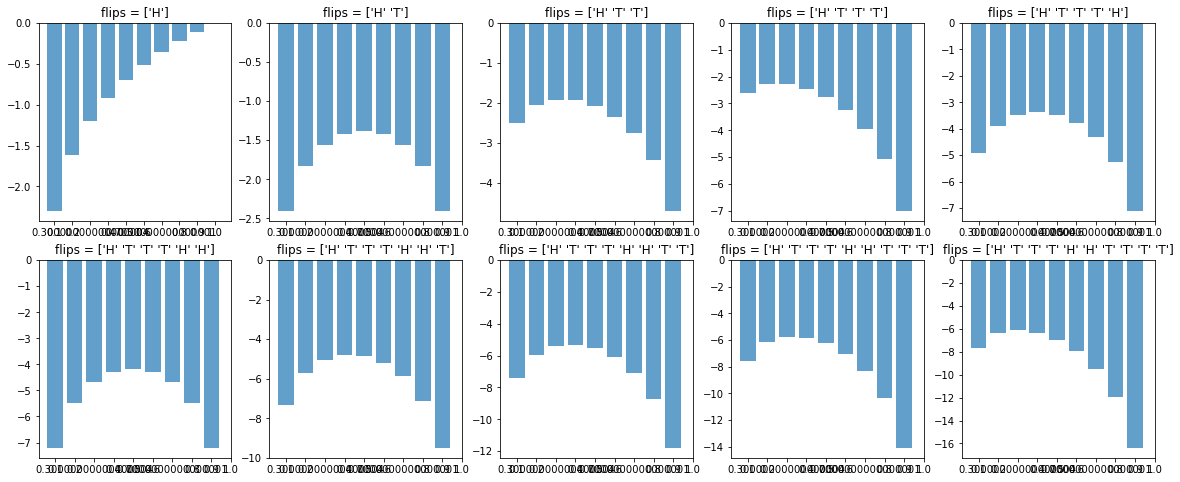

In [18]:
fig, axs = plt.subplots(2,5,figsize=(20,8))

data = np.array([[1], [1,0], [1,0,0], [1,0,0,0], [1,0,0,0,1], [1,0,0,0,1,1], [1,0,0,0,1,1,0], [1,0,0,0,1,1,0,0], [1,0,0,0,1,1,0,0,0], [1,0,0,0,1,1,0,0,0,0]])
ps = np.linspace(0.1, 1,num=10)


for datum, ax in zip(data, axs.flatten()):
    plot_coin_likelihood(ax, ps, datum)
    ax.set_title(f'flips = {np.array(["T","H"])[datum]}')



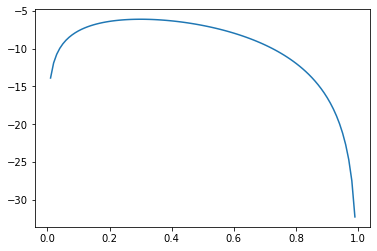

In [20]:
def plot_coin_likelihood_continuous(ax, data):
  x = np.linspace(0.01,.99,100)
  likelihoods = [coin_log_likelihood(p=p, flips=data) for p in x]
  ax.plot(x, likelihoods)


fig, ax = plt.subplots()
plot_coin_likelihood_continuous(ax, flip_data)
plt.show()

In [22]:
def maximum_coin_likelihood(data):
  x = np.linspace(0.01,.99,100)
  likelihoods = [coin_log_likelihood(p=p, flips=data) for p in x]
  return x[np.argmax(likelihoods)]

print(f'{maximum_coin_likelihood(flip_data):.2f}')


0.30


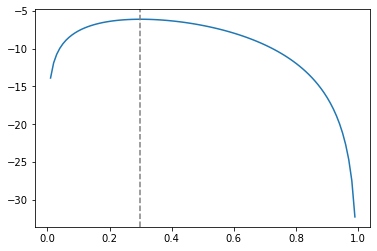

0.30


In [23]:
def maximum_coin_likelihood(data):
  x = np.linspace(0.01,.99,100)
  likelihoods = [coin_log_likelihood(p=p, flips=data) for p in x]
  return x[np.argmax(likelihoods)]


def plot_coin_likelihood_continuous(ax, data):
  x = np.linspace(0.01,.99,100)
  likelihoods = [coin_log_likelihood(p=p, flips=data) for p in x]
  ax.plot(x, likelihoods)
  maxLike = maximum_coin_likelihood(data)
  ax.axvline(maxLike, color='grey', linestyle='--')

fig, ax = plt.subplots()
plot_coin_likelihood_continuous(ax, flip_data)
plt.show()

print(f'{maximum_coin_likelihood(flip_data):.2f}')


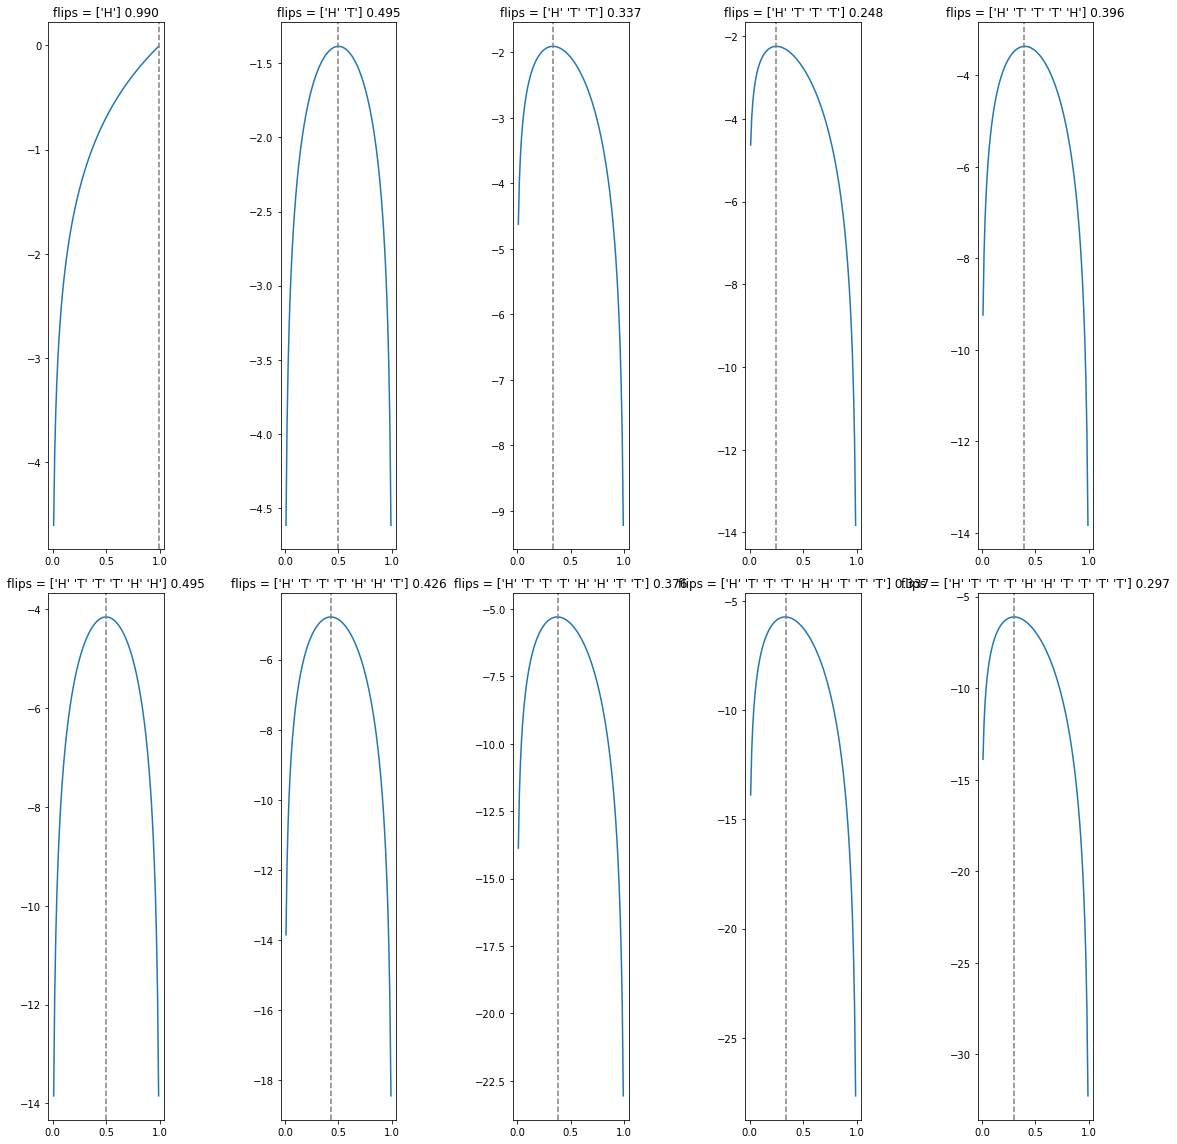

In [31]:
fig, axs = plt.subplots(2,5, figsize=(16,16))

for datum, ax in zip(data, axs.flatten()):
  plot_coin_likelihood_continuous(ax, datum)
  ax.set_title(f'flips = {np.array(["T","H"])[datum]} {maximum_coin_likelihood(datum):.3f}')
plt.tight_layout()
plt.show() 


In [32]:
# The maximum likelihood trends towards the mean of the flips.  

In [33]:
for datum in data:
    print(f'the mean {np.mean(datum)} = {maximum_coin_likelihood(datum)} the MLI')

the mean 1.0 = 0.99 the MLI
the mean 0.5 = 0.495050505050505 the MLI
the mean 0.3333333333333333 = 0.33666666666666667 the MLI
the mean 0.25 = 0.24757575757575756 the MLI
the mean 0.4 = 0.39606060606060606 the MLI
the mean 0.5 = 0.495050505050505 the MLI
the mean 0.42857142857142855 = 0.4257575757575757 the MLI
the mean 0.375 = 0.37626262626262624 the MLI
the mean 0.3333333333333333 = 0.33666666666666667 the MLI
the mean 0.3 = 0.29707070707070704 the MLI
